<a href="https://colab.research.google.com/github/Snigdha-Pothuri/p-122/blob/main/project_122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
X=np.load('image.npz')["arr_0"]
y=pd.read_csv("labels.csv")["labels"]
classes=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
nclasses=len(classes)
print(X)
print(nclasses)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
26


1
27
53
79
105
2
28
54
80
106
3
29
55
81
107
4
30
56
82
108
5
31
57
83
109
6
32
58
84
110
7
33
59
85
111
8
34
60
86
112
9
35
61
87
113
10
36
62
88
114
11
37
63
89
115
12
38
64
90
116
13
39
65
91
117
14
40
66
92
118
15
41
67
93
119
16
42
68
94
120
17
43
69
95
121
18
44
70
96
122
19
45
71
97
123
20
46
72
98
124
21
47
73
99
125
22
48
74
100
126
23
49
75
101
127
24
50
76
102
128
25
51
77
103
129
26
52
78
104
130


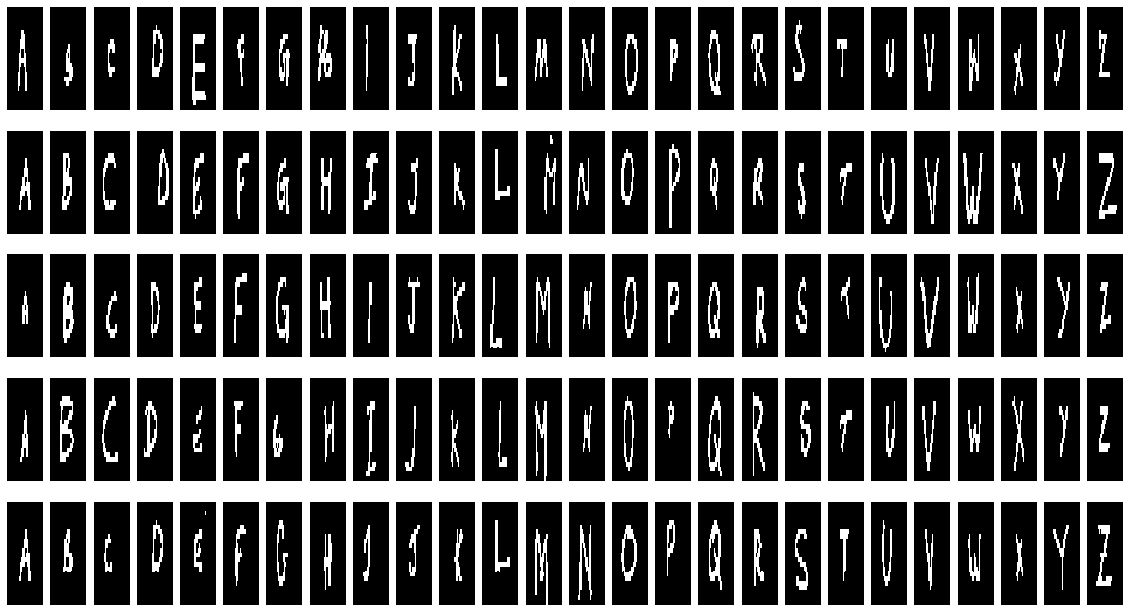

In [6]:
import seaborn as sns
sample_per_class=5
figure=plt.figure(figsize=(20,11))
idx_cls=0
for i in classes:
  idxs=np.flatnonzero(y==i)
  idxs=np.random.choice(idxs,sample_per_class,replace=False)
  j=0
  for k in idxs:
    plt_index=j*nclasses+idx_cls+1
    print(plt_index)
    p=plt.subplot(sample_per_class,nclasses,plt_index)
    p=sns.heatmap(np.reshape(X[k],(22,30)),cmap=plt.cm.gray,cbar=False)
    p=plt.axis("off")
    j=j+1
  idx_cls=idx_cls+1

In [ ]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [12]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=9,train_size=7500,test_size=2500)
Xtrainscaled=Xtrain/255.0
Xtestscaled=Xtest/255.0
clf=LogisticRegression(solver="saga",multi_class="multinomial").fit(Xtrainscaled,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
yprediction=clf.predict(Xtestscaled)
accuracy=accuracy_score(Ytest,yprediction)
print(accuracy)

0.9952


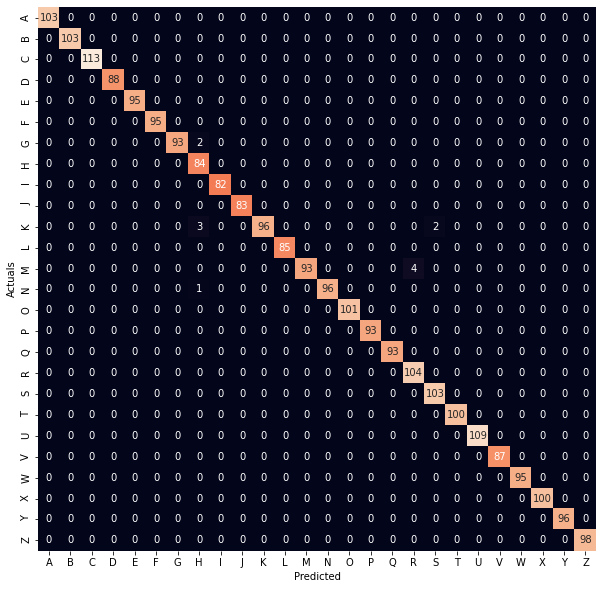

In [15]:
cm = pd.crosstab(Ytest, yprediction, rownames=['Actuals'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)